In [268]:
import pandas as pd
import numpy as np

In [269]:
df = pd.read_csv('sample.csv')

In [270]:
# 칼럼 채우기
df.columns = ['방송', '식당', '방영일', '포스팅일', '제목']
df.head()

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,20170322,2017. 4. 12. 0:00,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,20170322,2017. 4. 21. 16:17,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,20170322,2017. 4. 17. 14:44\n\t,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...
3,수요미식회,서대문양꼬치,20170322,2017. 3. 18. 12:39,연남동 맛집 서대문 양꼬치 - 수요미식회 중식로드
4,수요미식회,서대문양꼬치,20170322,2017. 4. 17. 0:59\n\t,연남동 서대문양꼬치


In [271]:
# 방영일 날짜 date 객체로 바꾸기
from datetime import date

b_date = []

for data in df['방영일']:
    year = str(data)[:4]
    month = str(data)[4:6]
    day = str(data)[6:8]
    single_date = date(int(year), int(month), int(day))
    b_date.append(single_date)
    
df['방영일'] = pd.Series(b_date)
df.head(3)

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 12. 0:00,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 21. 16:17,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 17. 14:44\n\t,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...


In [272]:
# 포스팅 날짜 date 객체로 바꾸기

for data in df['포스팅일']:
    date_components = data.split('.')
    year = date_components[0]
    month = date_components[1]
    day = date_components[2]
    single_date = date(int(year), int(month), int(day))
    p_date.append(single_date)
    
df['포스팅일'] = pd.Series(p_date)
df.head(3)

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,2017-03-22,2017-04-12,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,2017-03-22,2017-04-21,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
방송      335 non-null object
식당      335 non-null object
방영일     335 non-null object
포스팅일    335 non-null object
제목      335 non-null object
dtypes: object(5)
memory usage: 13.2+ KB


In [274]:
# 방영일과 포스팅 날짜 차이 구하기
df['days_diff'] = df['포스팅일'] - df['방영일']
df['days_diff'] = df['days_diff']
df['days_diff'] = df['days_diff'].astype(str).str.findall(r'(\-?\d+)\s')

In [275]:
# 00days에서 00만 남기기
days_list = []
for days in df['days_diff']:
    days_list.append(int(days[0]))

df['days_diff'] = days_list
df.head()

,방송,식당,방영일,포스팅일,제목,days_diff
0,수요미식회,서대문양꼬치,2017-03-22,2017-04-12,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집,21
1,수요미식회,서대문양꼬치,2017-03-22,2017-04-21,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!,30
2,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...,26
3,수요미식회,서대문양꼬치,2017-03-22,2017-03-18,연남동 맛집 서대문 양꼬치 - 수요미식회 중식로드,-4
4,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,연남동 서대문양꼬치,26


In [276]:
# 식당명과 days_diff로 그룹화하기
df_group = df.groupby(['식당', 'days_diff']).count().reset_index()
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
식당           151 non-null object
days_diff    151 non-null int64
방송           151 non-null int64
방영일          151 non-null int64
포스팅일         151 non-null int64
제목           151 non-null int64
dtypes: int64(5), object(1)
memory usage: 7.2+ KB


In [277]:
df_group.head(3)

,식당,days_diff,방송,방영일,포스팅일,제목
0,나노하나,-28,1,1,1,1
1,나노하나,-27,1,1,1,1
2,나노하나,-26,2,2,2,2


In [278]:
df_group.tail(3)

,식당,days_diff,방송,방영일,포스팅일,제목
148,서대문양꼬치,26,2,2,2,2
149,서대문양꼬치,29,2,2,2,2
150,서대문양꼬치,30,2,2,2,2


In [279]:
# 식당 2개로 일단 테이블을 나눠보자
df_group['식당'].unique()

array(['나노하나', '바라티에', '백곰막걸리', '서대문양꼬치'], dtype=object)

In [280]:
df_nano = df_group[df_group['식당']=='나노하나']
df_bara = df_group[df_group['식당']=='바라티에']

In [281]:
df_nano.head(3)

,식당,days_diff,방송,방영일,포스팅일,제목
0,나노하나,-28,1,1,1,1
1,나노하나,-27,1,1,1,1
2,나노하나,-26,2,2,2,2


C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


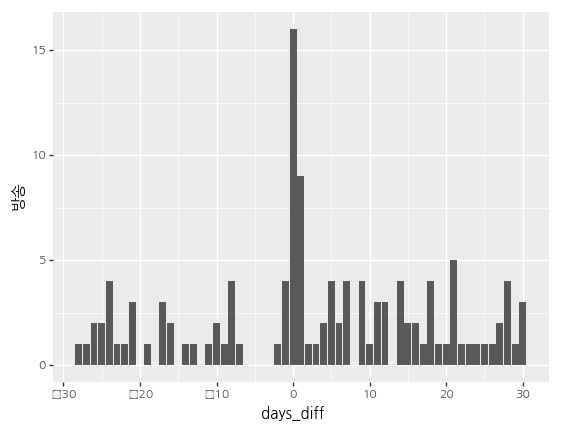

<ggplot: (-9223372033437334072)>

In [282]:
from plotnine import *
# 나노하나
# 1) 일별로 정렬
df_nano = df_nano.sort_values(by='days_diff')

# 2) 그래프 그리기
(ggplot(df_nano)
 + aes(x='days_diff', y='방송')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


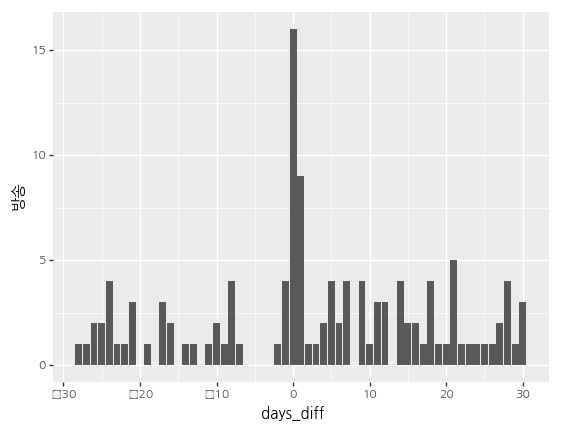

In [299]:
# 위에걸 함수로 만들어보자

def sort_and_graph(dataframe, sort_by, x_val, y_val):
    df = dataframe.sort_values(by=sort_by)
    (ggplot(df_nano)
     + aes(x=x_val, y=y_val)
     + geom_bar(stat='identity', position='dodge')
     + theme(text=element_text(family='NanumGothic'))
    ).draw()

# 바라티에에 적용해보기
sort_and_graph(df_bara, 'days_diff', 'days_diff', '방송')

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


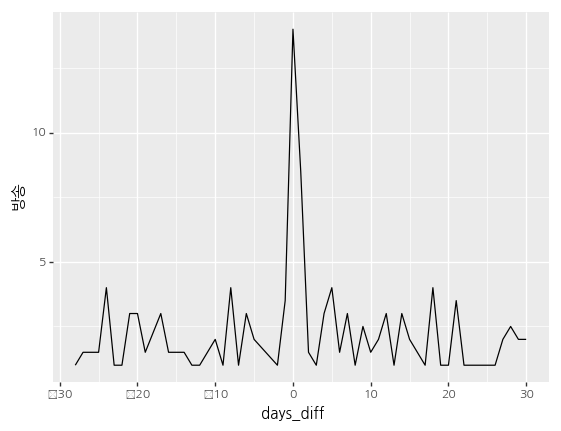

<ggplot: (-9223372033437733372)>

In [305]:
# days_diff 별로 포스팅 수를 평균내어보기
df_mean = df_nano.append(df_bara, ignore_index=True)
df_mean = df_mean.groupby(by='days_diff').agg(np.mean).reset_index()

(ggplot(df_mean)
 + aes(x='days_diff', y='방송')
 + geom_line()
 + theme(text=element_text(family='NanumGothic'))
)